In the following lines of code what will follow is manipulation of dataset.
This dataset is representing a 3 years of incoming shipments of different types 
in Kcm Ad for Zn line of production and Pb line of production.
First part will be cleaning and tidying the Zn set and then making some asumption then the Pb set. df=Zn dataset df1=pb dataset
And finaly merging both sets and making some general predictions and assumptions!

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

In [5]:
df=pd.read_excel("data/kcmdata.xlsx",header=None,
                     names=["count","date","number","material","type_sample","provider",
                            "country","weigth","delivery","аrbirtrage","lab"])

In [6]:
df.drop('count', axis=1, inplace=True)


In [7]:
# dropping the first 3 indexes as they are empty data and not needed
df=df.drop(df.index[[0,1,2]])


In [8]:
pd.set_option('display.height',2000)
pd.set_option('display.max_rows', 2000)

In [9]:
# checking the df
df

date   number  material   type_sample  \
3     2017-11-24 00:00:00      684  Zn окиси  парт.+сборна   
4     2017-11-24 00:00:00      683  Zn окиси  парт.+сборна   
5     2017-11-24 00:00:00      682  Zn окиси  парт.+сборна   
6     2017-11-24 00:00:00      681  Zn окиси  парт.+сборна   
7     2017-11-23 00:00:00      680  Zn окиси  парт.+сборна   
8     2017-11-23 00:00:00      679  Zn окиси  парт.+сборна   
9     2017-11-21 00:00:00      678    Zn к-т  парт.+сборна   
10    2017-11-20 00:00:00      677    Zn к-т      партидна   
11    2017-11-20 00:00:00      676  EAF Dust  парт.+сборна   
12    2017-11-17 00:00:00      675  Zn окиси  парт.+сборна   
13    2017-11-16 00:00:00      674  Zn окиси  парт.+сборна   
14    2017-11-16 00:00:00      673  Zn окиси  парт.+сборна   
15    2017-11-16 00:00:00      672  Zn окиси  парт.+сборна   
16    2017-11-16 00:00:00      671    Zn к-т      партидна   
17    2017-11-16 00:00:00      670    Zn к-т      партидна   
18    2017-11-16 00:00:00      669    Zn к-т      партидна   
19    2017-11-15 00:00:00      668  Zn окиси  парт.+сборна   
20    2017-11-15 00:00:00      667    Zn к-т  парт.+сборна   
21    2017-11-15 00:00:00      666    Zn к-т      партидна   
22    2017-11-15 00:00:00      665    Zn к-т      партидна   
23    2017-11-15 00:00:00      664  Zn окиси  парт.+сборна   
24    2017-11-15 00:00:00      663  Zn окиси  парт.+сборна   
25    2017-11-15 00:00:00      662  Zn окиси  парт.+сборна   
26    2017-11-14 00:00:00      661    Zn к-т        сборна   
27    2017-11-14 00:00:00      660    Zn к-т      партидна   
28    2017-11-14 00:00:00      659    Zn к-т      партидна   
29    2017-11-13 00:00:00      658  EAF Dust  парт.+сборна   
30    2017-11-10 00:00:00      657    Zn к-т      партидна   
31    2017-11-10 00:00:00      656    Zn к-т  парт.+сборна   
32    2017-11-09 00:00:00      654    Zn к-т      партидна   
33    2017-11-09 00:00:00      655    Zn к-т      партидна   
34    2017-11-06 00:00:00      653  Zn окиси  парт.+сборна   
35    2017-11-06 00:00:00      652  EAF Dust  парт.+сборна   
36    2017-11-06 00:00:00      651  Zn окиси  парт.+сборна   
37    2017-11-05 00:00:00      650    Zn к-т  парт.+сборна   
38    2017-11-02 00:00:00      649    Zn к-т      партидна   
39    2017-11-01 00:00:00      648    Zn к-т      партидна   
40    2017-11-01 00:00:00      647    Zn к-т        сборна   
41    2017-11-01 00:00:00      646    Zn к-т        сборна   
42    2017-11-01 00:00:00      645    Zn к-т        сборна   
43    2017-11-01 00:00:00      644    Zn к-т        сборна   
44    2017-11-01 00:00:00      643    Zn к-т        сборна   
45    2017-11-01 00:00:00      642    Zn к-т  парт.+сборна   
46    2017-10-31 00:00:00      641    Zn к-т        сборна   
47    2017-10-31 00:00:00      640    Zn к-т      партидна   
48    2017-10-31 00:00:00      639    Zn к-т      партидна   
49    2017-10-31 00:00:00      638    Zn к-т  парт.+сборна   
50    2017-10-31 00:00:00      637    Zn к-т  парт.+сборна   
51    2017-10-31 00:00:00      636    Zn к-т      партидна   
52    2017-10-31 00:00:00      635    Zn к-т      партидна   
53    2017-10-31 00:00:00      634    Zn к-т      партидна   
54    2017-10-31 00:00:00      633    Zn к-т      партидна   
55    2017-10-31 00:00:00      632    Zn к-т      партидна   
56    2017-10-30 00:00:00      631  EAF Dust  парт.+сборна   
57    2017-10-30 00:00:00      630  EAF Dust        сборна   
58    2017-10-30 00:00:00      629  EAF Dust        сборна   
59    2017-10-30 00:00:00      628  EAF Dust        сборна   
60    2017-10-27 00:00:00      627    Zn к-т        сборна   
61    2017-10-27 00:00:00      626    Zn к-т      партидна   
62    2017-10-25 00:00:00      625    Zn к-т  парт.+сборна   
63    2017-10-25 00:00:00      624    Zn к-т  парт.+сборна   
64    2017-10-25 00:00:00      623    Zn к-т        сборна   
65    2017-10-25 00:00:00      622    Zn к-т      партидна   
66    2017-10-25 00:00:00      621    Zn к-т      пар

In [10]:
# there is a mistake on that index  
#so we just remove it it is not good thing to do if the dataset is huge but for our case it is ok
df.drop(1794, inplace=True)

In [11]:
# converting date to datetime
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1810 entries, 3 to 1813
Data columns (total 10 columns):
date           1810 non-null datetime64[ns]
number         1810 non-null object
material       1810 non-null object
type_sample    1810 non-null object
provider       1810 non-null object
country        1748 non-null object
weigth         1502 non-null object
delivery       1508 non-null object
аrbirtrage     19 non-null object
lab            19 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 155.5+ KB


In [13]:
# extracting the month and year from date as single columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [14]:
# dropping date and rearaging our columns
df.drop('date', axis=1, inplace=True)

In [15]:
df = df[['year','month',"number","material","type_sample","provider",
                            "country","weigth","delivery","аrbirtrage","lab"]]

In [16]:
#df[['year', 'month']] = df[['year', 'month']].astype('int',errors='ignore')
#df['year'] = df['year'].fillna(0).astype(np.int64)
#df['month']=df['month'].fillna(0).astype(np.int64)


In [17]:
# now finishing with data cleaning,
#getting only the not null years converting dtype of weight,seting our display option back to normal
# dropping the columns we dont need or ar not with any value it does not work in one line so did it separately
#and finaly cleaning the data based on contions in delivery and provider columns

df = df[pd.notnull(df['year'])]

In [18]:
df['weigth'] = df['weigth'].fillna(0).astype(float)
df['weigth']=df['weigth'].round(2)

In [19]:
pd.set_option('display.height',100)
pd.set_option('display.max_rows',100)

In [20]:
df = df.drop(df[df.year==2014].index)

In [21]:
df.drop('number', axis=1, inplace=True)

In [22]:
df.drop('аrbirtrage', axis=1, inplace=True)

In [23]:
df.drop('lab',axis=1,inplace=True)

In [91]:
df=df[~df['provider'].str.contains('Бленда')] 

In [92]:
df=df[~df['provider'].str.contains('КЦМ')] 

In [93]:
df = df[pd.notnull(df['delivery'])]

In [24]:
#df['country'] = df['country'].fillna(Перу)
df['country'] = df['country'].replace(np.nan, 'Pery', regex=True)

In [95]:
col = ['delivery']
df[col] = df[col].applymap(np.int64)

In [25]:
df.reset_index(drop=True)

year  month  material   type_sample       provider    country  weigth  \
0     2017     11  Zn окиси  парт.+сборна            MCM   Холандия    0.00   
1     2017     11  Zn окиси  парт.+сборна            MCM   Холандия    0.00   
2     2017     11  Zn окиси  парт.+сборна            MCM   Холандия    0.00   
3     2017     11  Zn окиси  парт.+сборна            MCM   Холандия    0.00   
4     2017     11  Zn окиси  парт.+сборна            MCM   Холандия   41.22   
5     2017     11  Zn окиси  парт.+сборна            MCM   Холандия    3.85   
6     2017     11    Zn к-т  парт.+сборна           Грот      Полша  167.78   
7     2017     11    Zn к-т      партидна           Саса  Македония  474.01   
8     2017     11  EAF Dust  парт.+сборна   Airoforos_Gr     Гърция  397.09   
9     2017     11  Zn окиси  парт.+сборна            MCM   Холандия   79.65   
10    2017     11  Zn окиси  парт.+сборна            MCM   Холандия   67.56   
11    2017     11  Zn окиси  парт.+сборна            MCM   Холандия   21.25   
12    2017     11  Zn окиси  парт.+сборна            MCM   Холандия   42.71   
13    2017     11    Zn к-т      партидна  Върба-Батанци   България  403.32   
14    2017     11    Zn к-т      партидна       Минстрой   България  463.39   
15    2017     11    Zn к-т      партидна           Лъки   България  308.46   
16    2017     11  Zn окиси  парт.+сборна        MCM_ITA     Италия  153.93   
17    2017     11    Zn к-т  парт.+сборна           Грот      Полша  167.03   
18    2017     11    Zn к-т      партидна        Злетово  Македония   67.63   
19    2017     11    Zn к-т      партидна       Тораница  Македония  277.25   
20    2017     11  Zn окиси  парт.+сборна            MCM   Холандия   27.74   
21    2017     11  Zn окиси  парт.+сборна           MCM.        USA   19.22   
22    2017     11  Zn окиси  парт.+сборна           MCM.        USA   18.90   
23    2017     11    Zn к-т        сборна     Сребреница     Сърбия    0.00   
24    2017     11    Zn к-т      партидна     Сребреница     Сърбия  396.66   
25    2017     11    Zn к-т      партидна     Сребреница     Сърбия  399.58   
26    2017     11  EAF Dust  парт.+сборна   Airoforos_Gr     Гърция  478.60   
27    2017     11    Zn к-т      партидна           Саса  Македония  481.72   
28    2017     11    Zn к-т  парт.+сборна         Майдан     Сърбия  273.17   
29    2017     11    Zn к-т      партидна       Трепча А     Косово  346.78   
30    2017     11    Zn к-т      партидна       Трепча В     Косово  114.44   
31    2017     11  Zn окиси  парт.+сборна           MCM.        USA   19.59   
32    2017     11  EAF Dust  парт.+сборна   Airoforos_Gr     Гърция  362.16   
33    2017     11  Zn окиси  парт.+сборна        MCM_ITA     Италия  155.07   
34    2017     11    Zn к-т  парт.+сборна           Грот      Полша  170.03   
35    2017     11    Zn к-т      партидна           Саса  Македония  332.82   
36    2017     11    Zn к-т      партидна           Саса  Македония  480.36   
37    2017     11    Zn к-т        сборна       Тораница  Македония    0.00   
38    2017     11    Zn к-т        сборна        Злетово  Македония    0.00   
39    2017     11    Zn к-т        сборна  Върба-Батанци   България    0.00   
40    2017     11    Zn к-т        сборна       Минстрой   България    0.00   
41    2017     11    Zn к-т        сборна           Лъки   България    0.00   
42    2017     11    Zn к-т  парт.+сборна       Рудметал   България   16.25   
43    2017     10    Zn к-т        сборна           Грот      Полша    0.00   
44    2017     10    Zn к-т      партидна           Грот      Полша  173.10   
45    2017     10    Zn к-т      партидна           Грот      Полша  167.16   
46    2017     10    Zn к-т  парт.+сборна   Трепча B-КЦМ     Косово  112.88   
47    2017     10    Zn к-т  парт.+сборна   Трепча A-КЦМ     Косово  348.28   
48    2017     10    Zn к-т      партидна  Върба-Батанци   България  436.59   
49    2017     10    Zn к-т      партидна        Злетово

In [26]:
# so finaly starting with 1813 rows now our clean data is 1421 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1809 entries, 3 to 1813
Data columns (total 8 columns):
year           1809 non-null int64
month          1809 non-null int64
material       1809 non-null object
type_sample    1809 non-null object
provider       1809 non-null object
country        1809 non-null object
weigth         1809 non-null float64
delivery       1507 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 127.2+ KB


In [27]:
# time to check is it working and is it correct lets make quick bar plot based on year and materials
peryear=df.groupby(["year","material"])["weigth"].sum().round(2)

In [28]:
peryear

year  material
2015  EAF Dust      7396.27
      Zn к-т      144266.41
      Zn окиси      9465.11
2016  EAF Dust      4392.50
      Zn к-т      136006.17
      Zn окиси     10934.37
2017  EAF Dust     24167.24
      Zn к-т      136783.52
      Zn окиси     12410.09
Name: weigth, dtype: float64

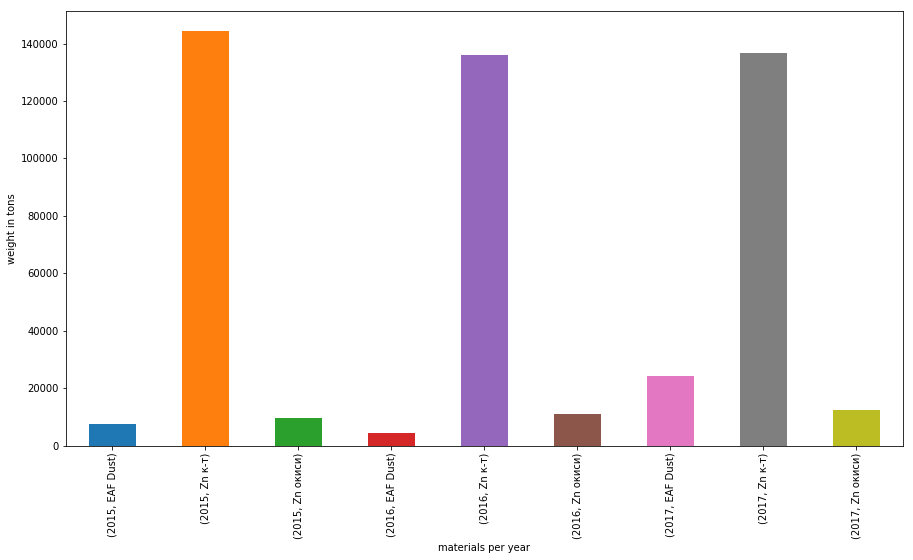

In [29]:
plt.figure(figsize=(15,8))
peryear.plot.bar()
plt.xlabel("materials per year")
plt.ylabel("weight in tons")
plt.show()


Ok Zn df is working properly now will basicly rewrite most of the same code to get the Pb dt ready
I will not drop anotations and comments for it as it will mostly repeat the same process of thinking as above

In [30]:
dff=pd.read_excel("data/kcmdata1.xlsx",header=None,
                     names=["count","date","number","material","type_sample","provider",
                            "country","weigth","delivery","аrbirtrage","lab",'Agarb'])

In [31]:
dff.drop('count', axis=1, inplace=True)


In [32]:
dff=dff.drop(dff.index[[0,1,2]])

In [33]:
pd.set_option('display.height',2000)
pd.set_option('display.max_rows', 2000)
dff

date number             material   type_sample  \
3     2017-11-24 00:00:00    418           Pb пепел В  парт.+сборна   
4     2017-11-22 00:00:00    417               Pb к-т      партидна   
5     2017-11-16 00:00:00    416               Pb к-т      партидна   
6     2017-11-16 00:00:00    415               Pb к-т  парт.+сборна   
7     2017-11-16 00:00:00    414               Pb к-т      партидна   
8     2017-11-16 00:00:00    413               Pb к-т      партидна   
9     2017-11-16 00:00:00    412               Pb к-т      партидна   
10    2017-11-15 00:00:00    411               Pb к-т      партидна   
11    2017-11-15 00:00:00    410               Pb к-т      партидна   
12    2017-11-14 00:00:00    409               Pb к-т        сборна   
13    2017-11-14 00:00:00    408               Pb к-т      партидна   
14    2017-11-10 00:00:00    407               Pb к-т  парт.+сборна   
15    2017-11-08 00:00:00    406               Pb к-т      партидна   
16    2017-11-07 00:00:00    405               Pb к-т      партидна   
17    2017-11-02 00:00:00    404               Pb к-т      партидна   
18    2017-11-01 00:00:00    403               Pb к-т        сборна   
19    2017-11-01 00:00:00    402               Pb к-т        сборна   
20    2017-11-01 00:00:00    401               Pb к-т        сборна   
21    2017-11-01 00:00:00    400               Pb к-т        сборна   
22    2017-11-01 00:00:00    399               Pb к-т        сборна   
23    2017-11-01 00:00:00    398               Pb к-т  парт.+сборна   
24    2017-10-31 00:00:00    397               Pb к-т      партидна   
25    2017-10-31 00:00:00    396               Pb к-т      партидна   
26    2017-10-31 00:00:00    395               Pb к-т      партидна   
27    2017-10-31 00:00:00    394               Pb к-т      партидна   
28    2017-10-31 00:00:00    393               Pb к-т      партидна   
29    2017-10-31 00:00:00    392               Pb к-т      партидна   
30    2017-10-30 00:00:00    391               Pb к-т  парт.+сборна   
31    2017-10-29 00:00:00    390            Pb ситнеж  парт.+сборна   
32    2017-10-29 00:00:00    389             Pb пепел  парт.+сборна   
33    2017-10-26 00:00:00    388               Pb к-т      партидна   
34    2017-10-26 00:00:00    387               Pb к-т        сборна   
35    2017-10-26 00:00:00    386               Pb к-т      партидна   
36    2017-10-26 00:00:00    385               Pb к-т      партидна   
37    2017-10-23 00:00:00    384               Pb к-т        сборна   
38    2017-10-23 00:00:00    383               Pb к-т      партидна   
39    2017-10-23 00:00:00    382               Pb к-т      партидна   
40    2017-10-23 00:00:00    381               Pb к-т      партидна   
41    2017-10-23 00:00:00    380               Pb к-т      партидна   
42    2017-10-23 00:00:00    379               Pb к-т        сборна   
43    2017-10-23 00:00:00    378               Pb к-т      партидна   
44    2017-10-23 00:00:00    377               Pb к-т      партидна   
45    2017-10-23 00:00:00    376               Pb к-т      партидна   
46    2017-10-23 00:00:00    375               Pb к-т      партидна   
47    2017-10-23 00:00:00    374               Pb к-т      партидна   
48    2017-10-23 00:00:00    373               Pb к-т      партидна   
49    2017-10-20 00:00:00    372               Pb к-т        сборна   
50    2017-10-20 00:00:00    371               Pb к-т      партидна   
51    2017-10-19 00:00:00    370               Pb к-т      партидна   
52    2017-10-19 00:00:00    369               Pb к-т  парт.+сборна   
53    2017-10-18 00:00:00    368               Pb к-т      партидна   
54    2017-10-16 00:00:00    367               Pb к-т      партидна   
55    2017-10-16 00:00:00    366               Pb к-т      партидна   
56    2017-10-16 00:00:00    365               Pb к-т      партидна   
57    2017-10-16 00:00:00    364               Pb к-т      партидна   
58    2017-10-16 00:00:00    363             

In [34]:
dff['date']=pd.to_datetime(dff['date'])

In [35]:
dff['year'] = dff['date'].dt.year
dff['month'] = dff['date'].dt.month

In [36]:
dff.drop('date', axis=1, inplace=True)

In [37]:
dff.drop('number', axis=1, inplace=True)

In [38]:
dff.drop('lab', axis=1, inplace=True)

In [39]:
dff.drop('аrbirtrage', axis=1, inplace=True)

In [40]:
dff.drop('Agarb', axis=1, inplace=True)

In [41]:
dff= dff[pd.notnull(dff['year'])]

In [42]:
dff=dff[~dff['provider'].str.contains('Бленда')] 

In [43]:
dff=dff[~dff['provider'].str.contains('КЦМ')] 

In [44]:
dff=dff[pd.notnull(dff['delivery'])]

In [45]:
dff.reset_index(drop=True)

material   type_sample       provider    country   weigth  \
0              Pb пепел В  парт.+сборна            MCM   Холандия      NaN   
1                  Pb к-т      партидна           Саса  Македония  491.419   
2                  Pb к-т      партидна           Саса  Македония  487.404   
3                  Pb к-т      партидна  Върба-Батанци   България  577.205   
4                  Pb к-т      партидна       Минстрой   България  338.343   
5                  Pb к-т      партидна           Лъки   България  313.531   
6                  Pb к-т      партидна        Злетово  Македония  261.582   
7                  Pb к-т      партидна       Тораница  Македония  211.903   
8                  Pb к-т      партидна           Саса  Македония  483.979   
9                  Pb к-т  парт.+сборна         Майдан     Сърбия  233.782   
10                 Pb к-т      партидна           Саса  Македония   491.35   
11                 Pb к-т      партидна         Турция     Турция    99.12   
12                 Pb к-т      партидна           Саса  Македония  488.529   
13                 Pb к-т  парт.+сборна       Рудметал   България   79.597   
14                 Pb к-т      партидна  Върба-Батанци   България  598.758   
15                 Pb к-т      партидна        Злетово  Македония  373.862   
16                 Pb к-т      партидна       Тораница  Македония  253.921   
17                 Pb к-т      партидна           Лъки   България  381.341   
18                 Pb к-т      партидна       Минстрой   България  355.118   
19                 Pb к-т      партидна           Саса  Македония  480.986   
20              Pb ситнеж  парт.+сборна            MCM   Холандия    2.616   
21               Pb пепел  парт.+сборна            MCM   Холандия    21.56   
22                 Pb к-т      партидна           Саса  Македония  489.676   
23                 Pb к-т      партидна         Рудник     Сърбия  227.654   
24                 Pb к-т      партидна         Рудник     Сърбия   226.02   
25                 Pb к-т      партидна           Саса  Македония  489.161   
26                 Pb к-т      партидна         Турция     Турция   99.829   
27                 Pb к-т  парт.+сборна     Босилметал     Сърбия   89.136   
28                 Pb к-т      партидна           Саса  Македония  491.759   
29                 Pb к-т      партидна        Злетово  Македония  234.933   
30                 Pb к-т      партидна       Тораница  Македония  234.113   
31                 Pb к-т      партидна  Върба-Батанци   България  617.479   
32                 Pb к-т      партидна       Минстрой   България  278.166   
33                 Pb к-т      партидна           Лъки   България  267.103   
34                 Pb к-т      партидна           Саса  Македония  488.185   
35                 Pb к-т  парт.+сборна         Майдан     Сърбия  275.858   
36                 Pb к-т      партидна           Саса  Македония  493.185   
37              Pb ситнеж  парт.+сборна            MCM   Холандия    2.626   
38               Pb пепел  парт.+сборна            MCM   Холандия   23.888   
39              Pb ситнеж  парт.+сборна            MCM   Холандия     6.65   
40               Pb пепел  парт.+сборна            MCM   Холандия   14.171   
41                 Pb к-т      партидна           Саса  Македония  291.164   
42                 Pb к-т  парт.+сборна       Рудметал   България  178.283   
43                 Pb к-т      партидна         Рудник     Сърбия  226.425   
44                 Pb к-т      партидна         Рудник     Сърбия  231.899   
45                 Pb к-т      партидна        Злетово  Македония  385.189   
46                 Pb к-т      партидна       Тораница  Македония  348.539   
47                 Pb к-т      партидна  Върба-Батанци   България  574.886   
48                 Pb к-т      партидна       Минстрой   България  282.322   
49                 Pb к-т      партидна           Лъки   България  279.594   
50                 Pb к-т      партидна

In [46]:
dff= dff[['year','month',"material","type_sample","provider",
                            "country","weigth","delivery"]]

In [47]:
dff['country'] = dff['country'].replace(np.nan, 'Полша', regex=True)

In [48]:
dff['weigth'].fillna(0).astype(float).round(2)

3         0.00
4       491.42
5       487.40
7       577.21
8       338.34
9       313.53
10      261.58
11      211.90
13      483.98
14      233.78
15      491.35
16       99.12
17      488.53
23       79.60
24      598.76
25      373.86
26      253.92
27      381.34
28      355.12
29      480.99
31        2.62
32       21.56
33      489.68
35      227.65
36      226.02
50      489.16
51       99.83
52       89.14
53      491.76
54      234.93
55      234.11
56      617.48
57      278.17
58      267.10
59      488.18
60      275.86
61      493.18
62        2.63
63       23.89
64        6.65
65       14.17
66      291.16
67      178.28
74      226.42
75      231.90
76      385.19
77      348.54
78      574.89
79      282.32
80      279.59
82      488.02
86      488.55
87        7.22
88       14.07
89      489.79
90       24.80
91       88.80
93       99.74
94      486.83
95        3.04
96       21.91
97        2.95
98       22.90
99        3.61
100      22.58
101     287.28
102     24

In [51]:
# so our year and date column decided to be floats so we will force them to int again.
cols = ['year', 'month','delivery']
dff[cols] = dff[cols].applymap(np.int64)

In [52]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 3 to 1405
Data columns (total 8 columns):
year           1023 non-null int64
month          1023 non-null int64
material       1023 non-null object
type_sample    1023 non-null object
provider       1023 non-null object
country        1023 non-null object
weigth         1022 non-null object
delivery       1023 non-null int64
dtypes: int64(3), object(5)
memory usage: 111.9+ KB


In [53]:
pbperyear=dff.groupby(['year','material'])['weigth'].sum().round(2)

In [54]:
pbperyear

year  material           
2015  Pb  пепел                 25.75
      Pb к-т                 88781.40
      Pb к-т пепел              23.49
      Pb пепел                 779.46
      Pb ситнеж                 24.10
2016  Pb к-т                 93832.92
      Pb окиси                  26.40
      Pb пепел                 857.20
      Pb пепел В               129.32
      Pb ситнеж                 95.21
2017  Pb к-т                 81228.84
      Pb окиси                 384.96
      Pb окиси-концентрат       42.78
      Pb пепел                 598.73
      Pb пепел В                59.12
      Pb ситнеж                 66.94
Name: weigth, dtype: float64

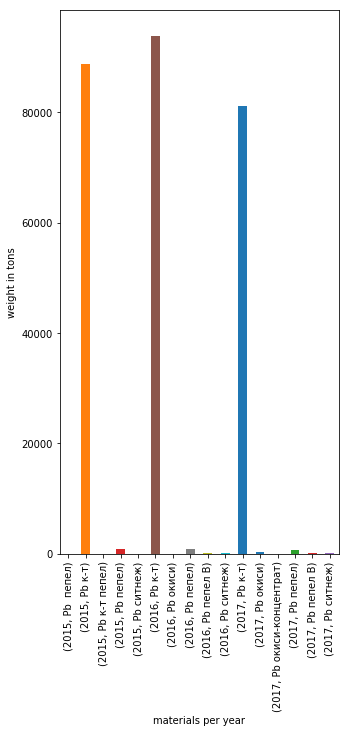

In [124]:
plt.figure(figsize=(5,10))
pbperyear.plot.bar()
plt.xlabel("materials per year")
plt.ylabel("weight in tons")
yticks=pbperyear.values
plt.show()
ml = MultipleLocator(5)


Ok our second df1 for Pb materials works too.If we play some with bar chart options we will make it more likeable and clear
but our goal is only to see if it works for now and if our data cleaning and tidying is ok.
Now what is left is to combine df and df1 and make some general presentations for the 2 main import flows in the factory.

In [56]:
# merging both datasets
ZnPbdf = df.append(dff)

In [58]:
ZnPbdf

year  month             material   type_sample  \
3     2017     11             Zn окиси  парт.+сборна   
4     2017     11             Zn окиси  парт.+сборна   
5     2017     11             Zn окиси  парт.+сборна   
6     2017     11             Zn окиси  парт.+сборна   
7     2017     11             Zn окиси  парт.+сборна   
8     2017     11             Zn окиси  парт.+сборна   
9     2017     11               Zn к-т  парт.+сборна   
10    2017     11               Zn к-т      партидна   
11    2017     11             EAF Dust  парт.+сборна   
12    2017     11             Zn окиси  парт.+сборна   
13    2017     11             Zn окиси  парт.+сборна   
14    2017     11             Zn окиси  парт.+сборна   
15    2017     11             Zn окиси  парт.+сборна   
16    2017     11               Zn к-т      партидна   
17    2017     11               Zn к-т      партидна   
18    2017     11               Zn к-т      партидна   
19    2017     11             Zn окиси  парт.+сборна   
20    2017     11               Zn к-т  парт.+сборна   
21    2017     11               Zn к-т      партидна   
22    2017     11               Zn к-т      партидна   
23    2017     11             Zn окиси  парт.+сборна   
24    2017     11             Zn окиси  парт.+сборна   
25    2017     11             Zn окиси  парт.+сборна   
26    2017     11               Zn к-т        сборна   
27    2017     11               Zn к-т      партидна   
28    2017     11               Zn к-т      партидна   
29    2017     11             EAF Dust  парт.+сборна   
30    2017     11               Zn к-т      партидна   
31    2017     11               Zn к-т  парт.+сборна   
32    2017     11               Zn к-т      партидна   
33    2017     11               Zn к-т      партидна   
34    2017     11             Zn окиси  парт.+сборна   
35    2017     11             EAF Dust  парт.+сборна   
36    2017     11             Zn окиси  парт.+сборна   
37    2017     11               Zn к-т  парт.+сборна   
38    2017     11               Zn к-т      партидна   
39    2017     11               Zn к-т      партидна   
40    2017     11               Zn к-т        сборна   
41    2017     11               Zn к-т        сборна   
42    2017     11               Zn к-т        сборна   
43    2017     11               Zn к-т        сборна   
44    2017     11               Zn к-т        сборна   
45    2017     11               Zn к-т  парт.+сборна   
46    2017     10               Zn к-т        сборна   
47    2017     10               Zn к-т      партидна   
48    2017     10               Zn к-т      партидна   
49    2017     10               Zn к-т  парт.+сборна   
50    2017     10               Zn к-т  парт.+сборна   
51    2017     10               Zn к-т      партидна   
52    2017     10               Zn к-т      партидна   
53    2017     10               Zn к-т      партидна   
54    2017     10               Zn к-т      партидна   
55    2017     10               Zn к-т      партидна   
56    2017     10             EAF Dust  парт.+сборна   
57    2017     10             EAF Dust        сборна   
58    2017     10             EAF Dust        сборна   
59    2017     10             EAF Dust        сборна   
60    2017     10               Zn к-т        сборна   
61    2017     10               Zn к-т      партидна   
62    2017     10               Zn к-т  парт.+сборна   
63    2017     10               Zn к-т  парт.+сборна   
64    2017     10               Zn к-т        сборна   
65    2017     10               Zn к-т      партидна   
66    2017     10               Zn к-т      партидна   
67    2017     10             Zn окиси  парт.+сборна   
68    2017     10             EAF Dust  парт.+сборна   
69    2017     10               Zn к-т      партидна   
70    2017     10               Zn к-т        сборна   
71    2017     10               Zn к-т      партидна   
72    2017     10               Zn к-т      партидна   
73    2017     10             

In [59]:
# well merging made some strange things with our data so we need to fix it a little bit again
ZnPbdf= ZnPbdf[['year','month',"material","type_sample","provider",
                            "country","weigth","delivery"]]

In [60]:
ZnPbdf.reset_index(drop=True)

year  month             material   type_sample  \
0     2017     11             Zn окиси  парт.+сборна   
1     2017     11             Zn окиси  парт.+сборна   
2     2017     11             Zn окиси  парт.+сборна   
3     2017     11             Zn окиси  парт.+сборна   
4     2017     11             Zn окиси  парт.+сборна   
5     2017     11             Zn окиси  парт.+сборна   
6     2017     11               Zn к-т  парт.+сборна   
7     2017     11               Zn к-т      партидна   
8     2017     11             EAF Dust  парт.+сборна   
9     2017     11             Zn окиси  парт.+сборна   
10    2017     11             Zn окиси  парт.+сборна   
11    2017     11             Zn окиси  парт.+сборна   
12    2017     11             Zn окиси  парт.+сборна   
13    2017     11               Zn к-т      партидна   
14    2017     11               Zn к-т      партидна   
15    2017     11               Zn к-т      партидна   
16    2017     11             Zn окиси  парт.+сборна   
17    2017     11               Zn к-т  парт.+сборна   
18    2017     11               Zn к-т      партидна   
19    2017     11               Zn к-т      партидна   
20    2017     11             Zn окиси  парт.+сборна   
21    2017     11             Zn окиси  парт.+сборна   
22    2017     11             Zn окиси  парт.+сборна   
23    2017     11               Zn к-т        сборна   
24    2017     11               Zn к-т      партидна   
25    2017     11               Zn к-т      партидна   
26    2017     11             EAF Dust  парт.+сборна   
27    2017     11               Zn к-т      партидна   
28    2017     11               Zn к-т  парт.+сборна   
29    2017     11               Zn к-т      партидна   
30    2017     11               Zn к-т      партидна   
31    2017     11             Zn окиси  парт.+сборна   
32    2017     11             EAF Dust  парт.+сборна   
33    2017     11             Zn окиси  парт.+сборна   
34    2017     11               Zn к-т  парт.+сборна   
35    2017     11               Zn к-т      партидна   
36    2017     11               Zn к-т      партидна   
37    2017     11               Zn к-т        сборна   
38    2017     11               Zn к-т        сборна   
39    2017     11               Zn к-т        сборна   
40    2017     11               Zn к-т        сборна   
41    2017     11               Zn к-т        сборна   
42    2017     11               Zn к-т  парт.+сборна   
43    2017     10               Zn к-т        сборна   
44    2017     10               Zn к-т      партидна   
45    2017     10               Zn к-т      партидна   
46    2017     10               Zn к-т  парт.+сборна   
47    2017     10               Zn к-т  парт.+сборна   
48    2017     10               Zn к-т      партидна   
49    2017     10               Zn к-т      партидна   
50    2017     10               Zn к-т      партидна   
51    2017     10               Zn к-т      партидна   
52    2017     10               Zn к-т      партидна   
53    2017     10             EAF Dust  парт.+сборна   
54    2017     10             EAF Dust        сборна   
55    2017     10             EAF Dust        сборна   
56    2017     10             EAF Dust        сборна   
57    2017     10               Zn к-т        сборна   
58    2017     10               Zn к-т      партидна   
59    2017     10               Zn к-т  парт.+сборна   
60    2017     10               Zn к-т  парт.+сборна   
61    2017     10               Zn к-т        сборна   
62    2017     10               Zn к-т      партидна   
63    2017     10               Zn к-т      партидна   
64    2017     10             Zn окиси  парт.+сборна   
65    2017     10             EAF Dust  парт.+сборна   
66    2017     10               Zn к-т      партидна   
67    2017     10               Zn к-т        сборна   
68    2017     10               Zn к-т      партидна   
69    2017     10               Zn к-т      партидна   
70    2017     10             

Now are two datasets are merged.There is many ways to do it.But finaly we can start do plots and explore the data.And in total we have 8 features and 2444 observations.So we have a lot of options to explore.As I like personaly "fivethirtyeight" site we will use their style implemented in mathplotlib

In [61]:
# keeping the line of code for the style e choose plt.style.use('fivethirtyeight')

In [62]:
# choosing our first plot lat see how the different deliveries align through the time period
deliveriesperyear=ZnPbdf.groupby(['year','material'])['weigth'].sum()

In [63]:
# so this is the info now we have to make it a plot 
deliveriesperyear

year  material           
2015  EAF Dust                 7396.270
      Pb  пепел                  25.748
      Pb к-т                  88781.398
      Pb к-т пепел               23.492
      Pb пепел                  779.455
      Pb ситнеж                  24.101
      Zn к-т                 144266.410
      Zn окиси                 9465.110
2016  EAF Dust                 4392.500
      Pb к-т                  93832.921
      Pb окиси                   26.397
      Pb пепел                  857.196
      Pb пепел В                129.325
      Pb ситнеж                  95.206
      Zn к-т                 136006.170
      Zn окиси                10934.370
2017  EAF Dust                24167.240
      Pb к-т                  81228.841
      Pb окиси                  384.958
      Pb окиси-концентрат        42.775
      Pb пепел                  598.726
      Pb пепел В                 59.119
      Pb ситнеж                  66.936
      Zn к-т                 136783.520
      Zn окиси

In [64]:
deliveriesperCountry=ZnPbdf.groupby(ZnPbdf['country'])['delivery'].count().sort_values(ascending=False)

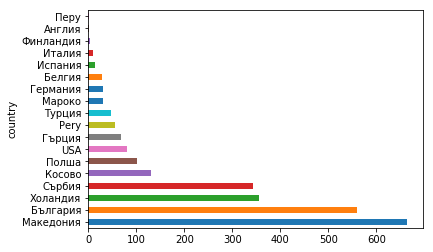

In [65]:
# so let see same series in two different plots
#first as bar it is good to see major trends,so we can safely cut our  countries to 10?
deliveriesperCountry.plot(kind='barh')

Text(0.5,0,'deliveries')

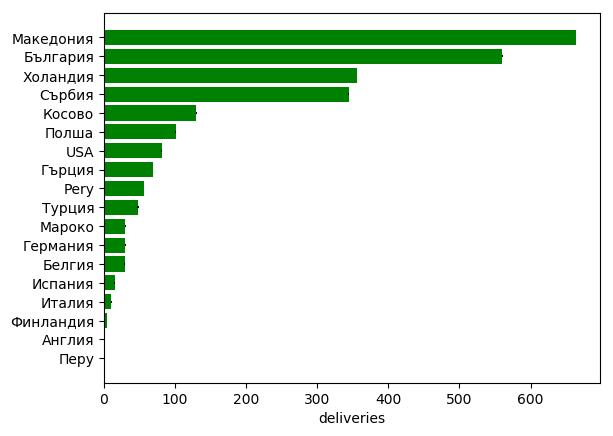

In [66]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = deliveriesperCountry.index
y_pos = np.arange(len(people))
performance =deliveriesperCountry.values
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('deliveries')

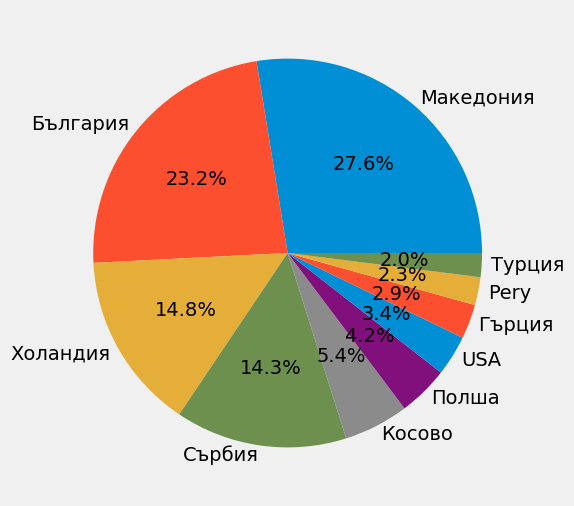

In [67]:
plt.style.use('fivethirtyeight')
d=deliveriesperCountry.head(10)
labels=d.index
slices=d.values
f=plt.figure(figsize=[6,6])
ax=f.add_subplot(111, aspect='equal')
p=plt.pie(d,labels=labels,autopct='%1.1f%%',labeldistance=1.05)
plt.show()
# so now we have our top 10  country per delivery,as you can see the lowest is 2% so we can dismiss them as non essential
# and now our pie plot is more readable

In [136]:
#so lets now make a view for the separated lines of supllies per year
deliveriesperyear=df.groupby(['year','material'])['weigth'].sum()

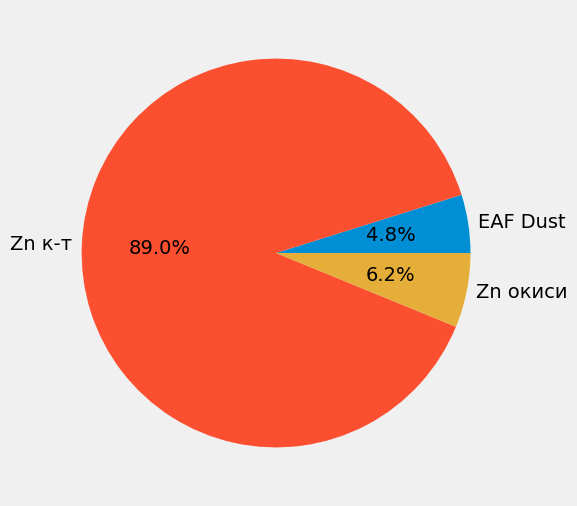

In [137]:
plt.style.use('fivethirtyeight')
a=deliveriesperyear[2015]
labels=a.index
slices=a.values
f=plt.figure(figsize=[6,6])
ax=f.add_subplot(111, aspect='equal')
p=plt.pie(a,labels=labels,autopct='%1.1f%%',labeldistance=1.05)
plt.show()

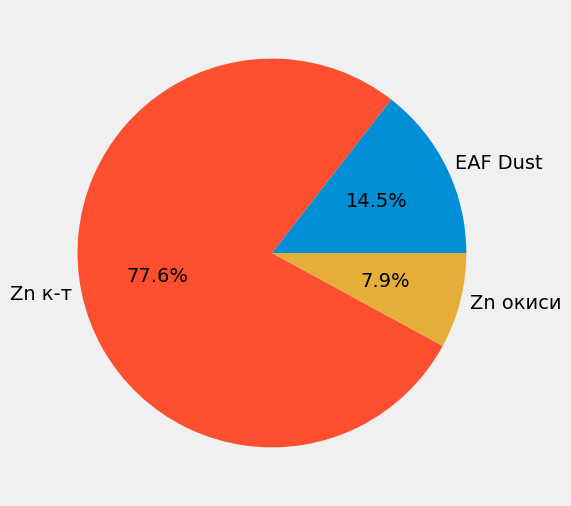

In [138]:
a=deliveriesperyear[2017]
labels=a.index
slices=a.values
f=plt.figure(figsize=[6,6])
ax=f.add_subplot(111, aspect='equal')
p=plt.pie(a,labels=labels,autopct='%1.1f%%',labeldistance=1.05)
plt.show()

In [139]:
b=deliveriesperyear=dff.groupby(['year','material'])['weigth'].sum()

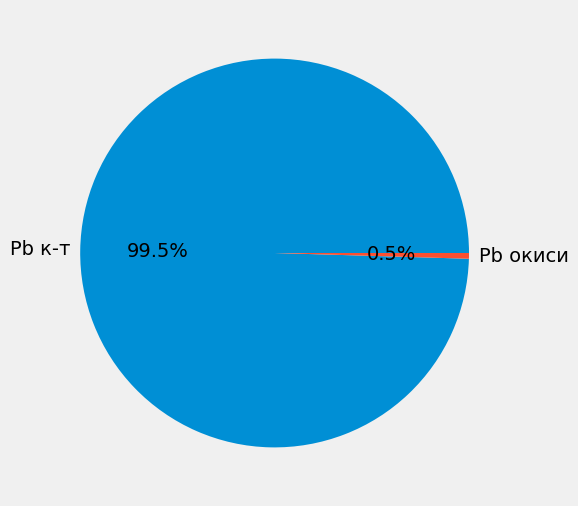

In [140]:
a=b[2017].head(2)
labels=a.index
slices=a.values
f=plt.figure(figsize=[6,6])
ax=f.add_subplot(111, aspect='equal')
p=plt.pie(a,labels=labels,autopct='%1.1f%%',labeldistance=1.05)
plt.show()

So we can continue to make what ever plots we want following the logic expressed above. 

In [141]:
materials2015=ZnPbdf.groupby(['year','month','country'])['provider'].count()[2015]

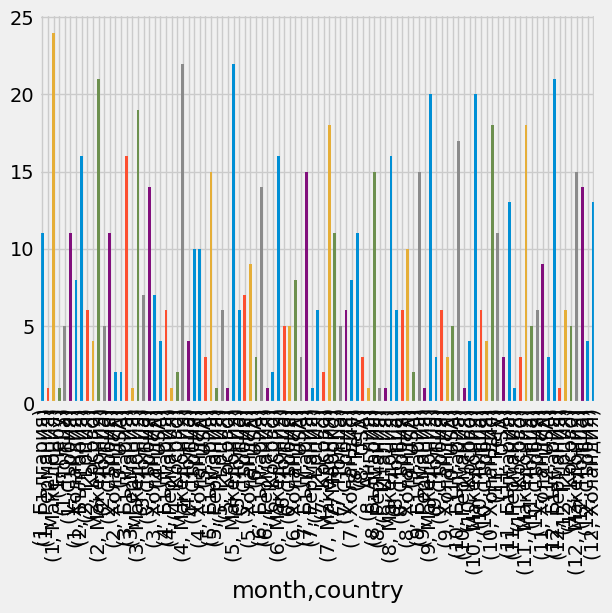

In [142]:
# one last graphic for the deliveirs per country for every month of 2015? as you can see it works but we have to fix the labels
materials2015.plot(kind="bar")